In [8]:
#import sql and connect to new database

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [9]:
#Create table

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [10]:
#Specify data

sample_data = [
    ("Toaster", 5, 25.0),
    ("Coffee mug", 12, 8.0),
    ("Air fryer", 7, 15.0),
    ("Pillow", 10, 12.0),
    ("Helmet", 6, 20.0),
]

In [11]:
# Insert the data

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

In [12]:
conn.commit()
conn.close()

print("Database and table created.")

Database and table created.


In [13]:
#Connect again.

conn = sqlite3.connect("sales_data.db")

In [14]:
#SQL query for total quantity and revenue per product

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [16]:
#Load results into pandaas dataframe

df = pd.read_sql_query(query, conn)

In [17]:
#Print summary

print("Sales Summary:\n", df)

Sales Summary:
       product  total_qty  revenue
0   Air fryer         14    210.0
1  Coffee mug         24    192.0
2      Helmet         12    240.0
3      Pillow         20    240.0
4     Toaster         10    250.0


In [21]:
#Calculate and Print total quantity and total revenue

total_qty = df['total_qty'].sum()
total_revenue = df['revenue'].sum()
print(f"\nTotal Quantity Sold: {total_qty}")
print(f"Total Revenue: ${total_revenue:.2f}")


Total Quantity Sold: 80
Total Revenue: $1132.00


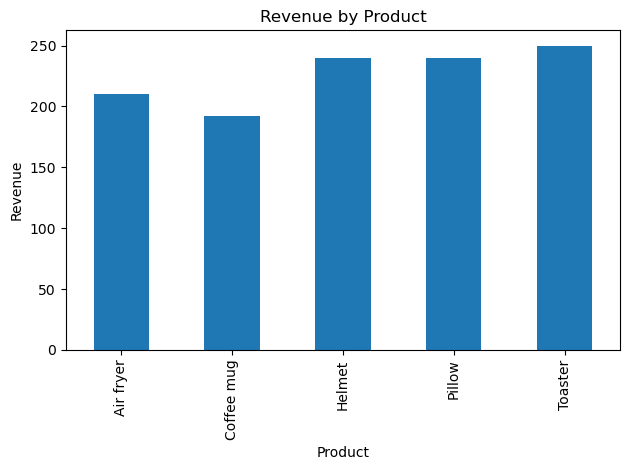

In [19]:
#Plot bar chart for revenue and save it

df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # saves chart
plt.show()

conn.close()